# Experimenting autoencoder with MNIST

## I - Imports

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms 
import matplotlib.pyplot as plt

## II - Load the Dataset

In [2]:
transform = transforms.Compose([transforms.ToTensor()])

trainset = torchvision.datasets.MNIST(root='./data', train=True,
                                        download=True, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=128, 
                                          shuffle=True)

testset = torchvision.datasets.MNIST(root='./data', train=False,
                                       download=True, transform=transform)

testloader = torch.utils.data.DataLoader(testset, batch_size=16,
                                         shuffle=False)


100.0%
100.0%
100.0%
100.0%


## III - Build an autoencoder

In [3]:
class Autoencoder(nn.Module):
    def __init__(self):
        super().__init__()
        self.encoder = nn.Sequential(
            nn.Linear(28*28, 128),
            nn.ReLU(),
            nn.Linear(128, 32),
            nn.ReLU()
        )
        self.decoder = nn.Sequential(
            nn.Linear(32, 128),
            nn.ReLU(), 
            nn.Linear(128, 28*28),
            nn.Sigmoid()
        )
    
    def forward(self, x):
        x = x.view(-1, 28*28)
        z = self.encoder(x)
        x_recon = self.decoder(z)
        return x_recon.view(-1, 1, 28, 28)


net = Autoencoder()

## IV - Loss function and optimization parameters

In [5]:
criterion = nn.MSELoss()
optimizer = optim.Adam(net.parameters(), lr=1e-3)

## V - Training Loop

In [6]:
num_epoch = 10

for epoch in range(num_epoch):
    running_loss = 0.0
    for data in trainloader:
        inputs, _ = data
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, inputs)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    
    print(f'Epoch [{epoch+1}/{num_epoch}] Loss: {running_loss/len(trainloader):.4f}')

print('Finished training')



Epoch [1/10] Loss: 0.0523
Epoch [2/10] Loss: 0.0239
Epoch [3/10] Loss: 0.0192
Epoch [4/10] Loss: 0.0172
Epoch [5/10] Loss: 0.0161
Epoch [6/10] Loss: 0.0154
Epoch [7/10] Loss: 0.0148
Epoch [8/10] Loss: 0.0143
Epoch [9/10] Loss: 0.0139
Epoch [10/10] Loss: 0.0135
Finished training


## VI - Test and visualize results

In [7]:
net.eval()

dataiter = iter(testloader)
images, _ = next(dataiter)

with torch.no_grad():
    reconstructed = net(images)

## VII - Plot Original vs Reconstructed 

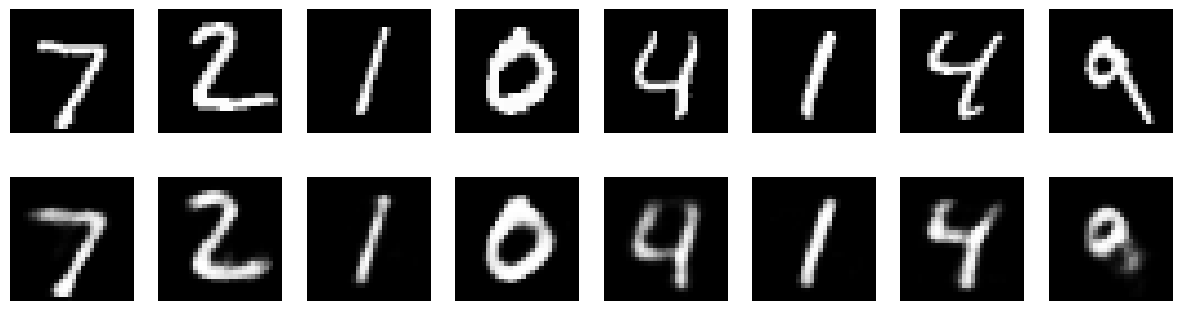

In [8]:
def imshow(img, title=None):
    plt.imshow(img.squeeze().numpy(), cmap='gray')
    if title: 
        plt.title(title)
    plt.axis('off')

n = 8
plt.figure(figsize=(15, 4))
for i in range(n):
    # Original images
    plt.subplot(2, n, i + 1)
    imshow(images[i])
    if i == 0:
        plt.ylabel('Original', fontsize=12)

    # Reconstructed images
    plt.subplot(2, n, i + 1 + n)
    imshow(reconstructed[i])
    if i == 0:
        plt.ylabel('Reconstructed', fontsize=12)

plt.show()
